# Thyroid Disease Classification Using Multi-layer Perceptron Neural Network

In [2]:
# Import packages

import pandas as pd
import numpy as np
from keras.models import load_model
from pandas_ml import ConfusionMatrix
from sklearn.model_selection import KFold
from keras import models
from keras import layers
from keras import regularizers

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [3]:
# Load the balanced dataset.

df_train = pd.read_csv('mwmote-norm-ann-train.csv')

## Explore the balanced dataset.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 37 columns):
age                      3984 non-null float64
sex_0                    3984 non-null int64
sex_1                    3984 non-null int64
on_thyroxine_0           3984 non-null int64
on_thyroxine_1           3984 non-null int64
query_thyroxine_0        3984 non-null int64
query_thyroxine_1        3984 non-null int64
on_antithyroid_meds_0    3984 non-null int64
on_antithyroid_meds_1    3984 non-null int64
sick_0                   3984 non-null int64
sick_1                   3984 non-null int64
pregnant_0               3984 non-null int64
pregnant_1               3984 non-null int64
thyroid_surgery_0        3984 non-null int64
thyroid_surgery_1        3984 non-null int64
T131_treat_0             3984 non-null int64
T131_treat_1             3984 non-null int64
query_hypothyroid_0      3984 non-null int64
query_hypothyroid_1      3984 non-null int64
query_hyperthyroid_0     3984 non-nu

In [6]:
print(df_train.head())

        age  sex_0  sex_1  on_thyroxine_0  on_thyroxine_1  query_thyroxine_0  \
0  0.624884      1      0               1               0                  1   
1  0.590000      0      1               1               0                  1   
2  0.170000      1      0               1               0                  1   
3  0.550000      1      0               1               0                  1   
4  0.150000      0      1               1               0                  1   

   query_thyroxine_1  on_antithyroid_meds_0  on_antithyroid_meds_1  sick_0  \
0                  0                      1                      0       1   
1                  0                      1                      0       1   
2                  0                      1                      0       1   
3                  0                      1                      0       1   
4                  0                      1                      0       1   

   ...    hypoituitary_0  hypoituitary_1  psych_0 

In [7]:
df_train['T3'].head()

0    0.173904
1    0.192600
2    0.128083
3    0.190702
4    0.317837
Name: T3, dtype: float64

In [9]:
df_train['sex_0'].value_counts()

1    3008
0     976
Name: sex_0, dtype: int64

In [13]:
df_train[['T4U', 'FTI']].describe()

,T4U,FTI
count,3984.000000,3984.000000
mean,0.380559,0.154387
std,0.081558,0.063681
min,0.000000,0.000000
25%,0.333333,0.126723
50%,0.375587,0.158071
75%,0.417840,0.181967
max,1.000000,1.000000


In [14]:
df_train['FTI'].max()

1.0

In [19]:
print(df_train[df_train['sex_0'] == 1].head())

        age  sex_0  sex_1  on_thyroxine_0  on_thyroxine_1  query_thyroxine_0  \
0  0.624884      1      0               1               0                  1   
2  0.170000      1      0               1               0                  1   
3  0.550000      1      0               1               0                  1   
5  0.340000      1      0               1               0                  1   
7  0.640000      1      0               1               0                  1   

   query_thyroxine_1  on_antithyroid_meds_0  on_antithyroid_meds_1  sick_0  \
0                  0                      1                      0       1   
2                  0                      1                      0       1   
3                  0                      1                      0       1   
5                  0                      1                      0       1   
7                  0                      1                      0       1   

   ...    hypoituitary_0  hypoituitary_1  psych_0 

In [21]:
df_train[df_train['sex_0']==1][['age', 'T3', 'T4U']].describe()

,age,T3,T4U
count,3008.000000,3008.000000,3008.000000
mean,0.528670,0.164952,0.390190
std,0.181683,0.073718,0.083867
min,0.010000,0.000000,0.000000
25%,0.385578,0.123525,0.339377
50%,0.559662,0.170022,0.377585
75%,0.673164,0.192600,0.427230
max,0.940000,0.801708,1.000000


In [24]:
# Plot some charts.

# Set the defaults for seaborn
sns.set()

# Set the scale of plot elements using a preset context (paper, notebook, talk, and poster).
sns.set_context('talk')

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


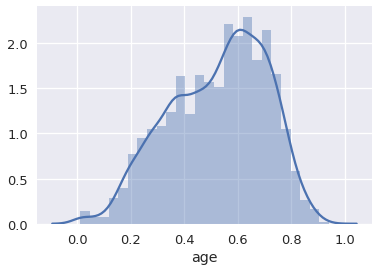

In [25]:
sns.distplot(df_train['age'])

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


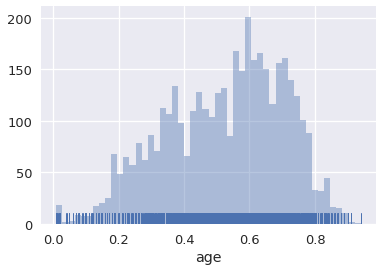

In [26]:
sns.distplot(df_train['age'], bins=50, rug=True, kde=False)

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


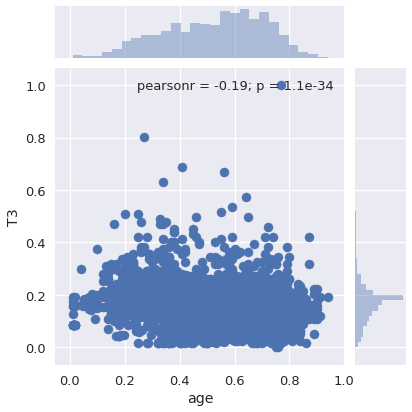

In [27]:
sns.jointplot(df_train['age'], df_train['T3'])

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


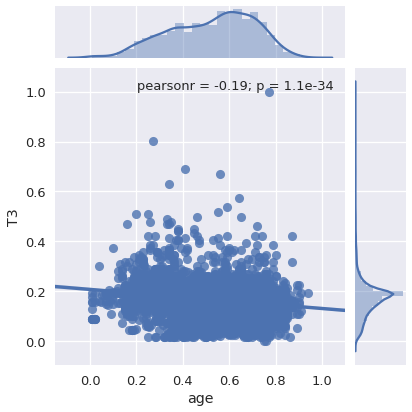

In [29]:
sns.jointplot(df_train['age'], df_train['T3'], kind='reg')

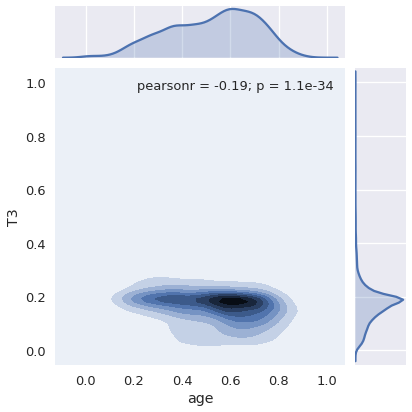

In [30]:
sns.jointplot(df_train['age'], df_train['T3'], kind='kde', shade=True)

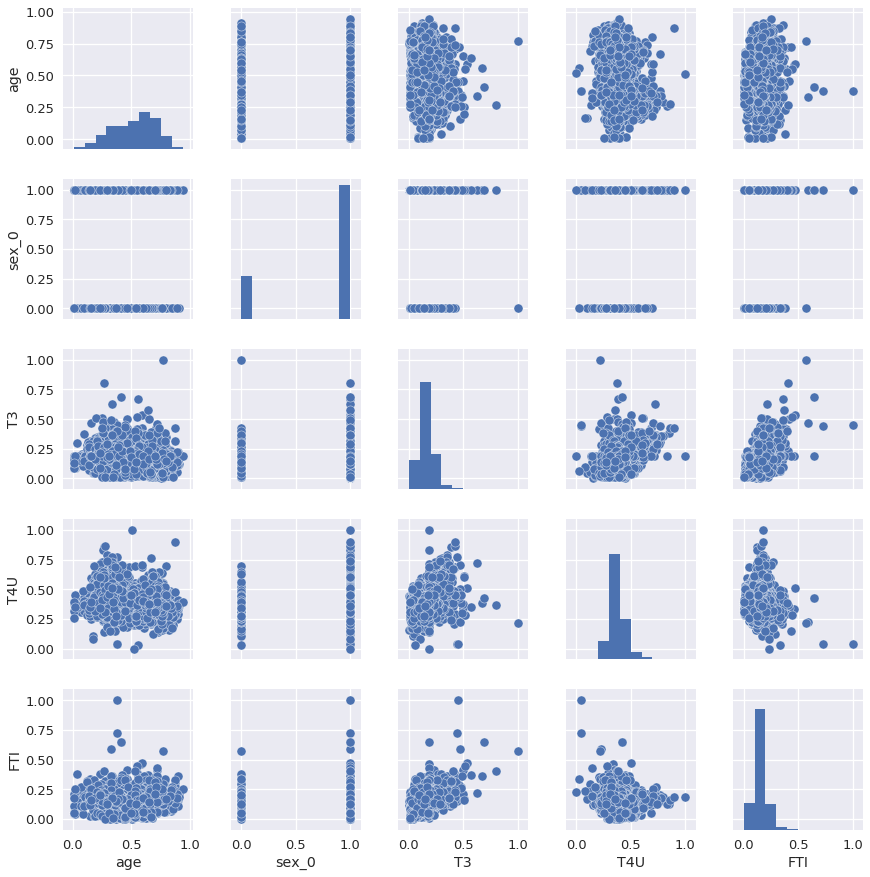

In [31]:
sns.pairplot(df_train[['age', 'sex_0', 'T3', 'T4U', 'FTI']])


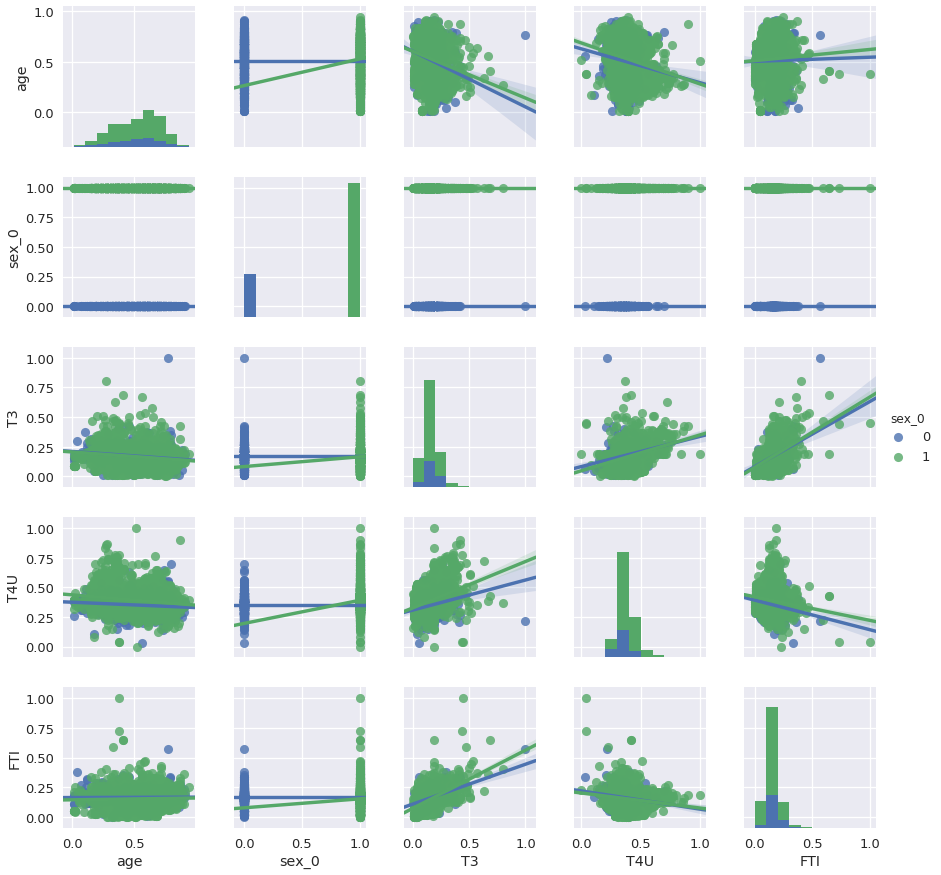

In [33]:
sns.pairplot(df_train[['age', 'sex_0', 'T3', 'T4U', 'FTI']], hue='sex_0', kind='reg')


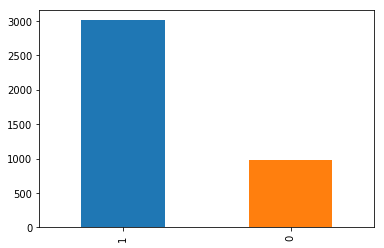

In [7]:
df_train['sex_0'].value_counts().plot.bar()

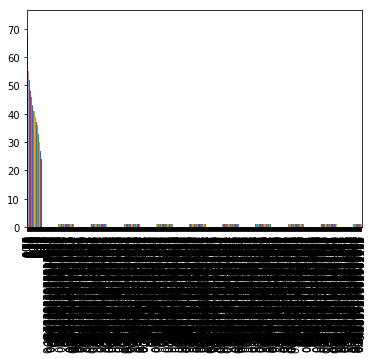

In [22]:
#df_train[((df_train['age']>20) and (df_train['age']<45))]['age'].value_counts().plot.bar()
df_train[df_train['age']<7]['age'].value_counts().plot.bar()

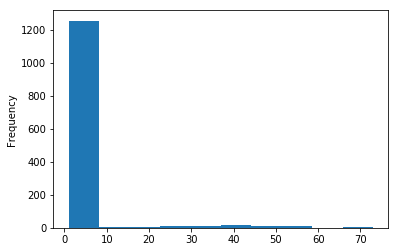

In [21]:
df_train['age'].value_counts().plot.hist()

In [23]:
df_train['age'].head()

0    0.624884
1    0.590000
2    0.170000
3    0.550000
4    0.150000
Name: age, dtype: float64

In [26]:
df_train['age'].describe()

count    3984.000000
mean        0.524422
std         0.181041
min         0.010000
25%         0.383295
50%         0.550000
75%         0.670000
max         0.940000
Name: age, dtype: float64